In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Understad Data

In [2]:
df = pd.read_csv('/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv', sep=',')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [3]:
# View the shape and info of the dataset
row, col = df.shape
print('Row = ', row, 'Col = ', col)

df.info()

Row =  4340 Col =  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
# Split the column name to get the model of the car
df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

In [5]:
# Check null values in dataset
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [6]:
# Check duplicated row in dataset
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [7]:
# Drop all duplicated row
df = df.drop_duplicates()

df.shape

(3577, 9)

In [8]:
# View unique values from categorical features
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for col in categorical:
  print(df[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [9]:
# Summary of the data set
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Exploratory Data Analysis

In [10]:
car = df.copy()

## Model Distribution

In [11]:
car["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object')

In [12]:
def percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.2
        height = i.get_height()+4.3 
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=14,color='black')

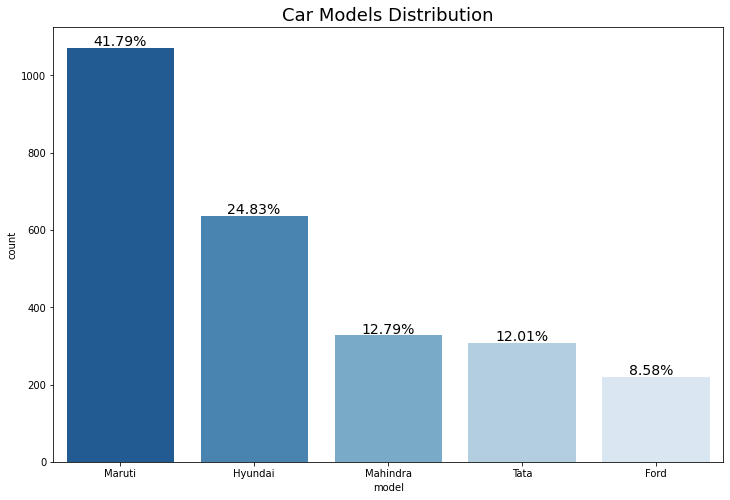

In [13]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="model", data=car, order = car['model'].value_counts().index[:5], palette='Blues_r')
percent(plot)

plt.show()

In the Car Dekho dataset, cars with the Maruti model are the most numerous models in the dataset after Hyundai and Mahindra.

## Categorical Summary

In [14]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Blues_r', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count       3577
unique         5
top       Diesel
freq        1800
Name: fuel, dtype: object
mode:  0    Diesel
dtype: object
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64


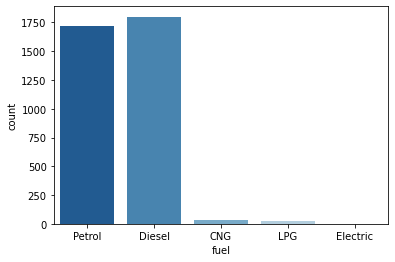

In [15]:
categorical_summarized(car, x='fuel')

count           3577
unique             3
top       Individual
freq            2832
Name: seller_type, dtype: object
mode:  0    Individual
dtype: object
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64


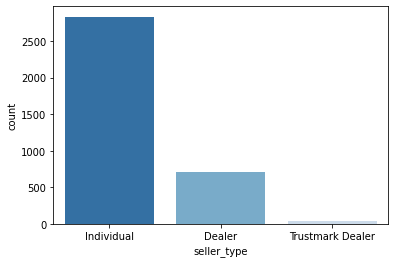

In [16]:
categorical_summarized(car, x='seller_type')

count       3577
unique         2
top       Manual
freq        3265
Name: transmission, dtype: object
mode:  0    Manual
dtype: object
Manual       3265
Automatic     312
Name: transmission, dtype: int64


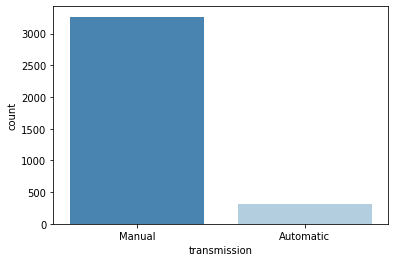

In [17]:
categorical_summarized(car, x='transmission')

count            3577
unique              5
top       First Owner
freq             2218
Name: owner, dtype: object
mode:  0    First Owner
dtype: object
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64


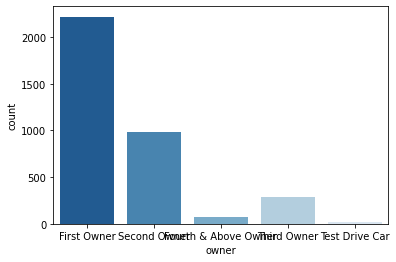

In [18]:
categorical_summarized(car, x='owner')

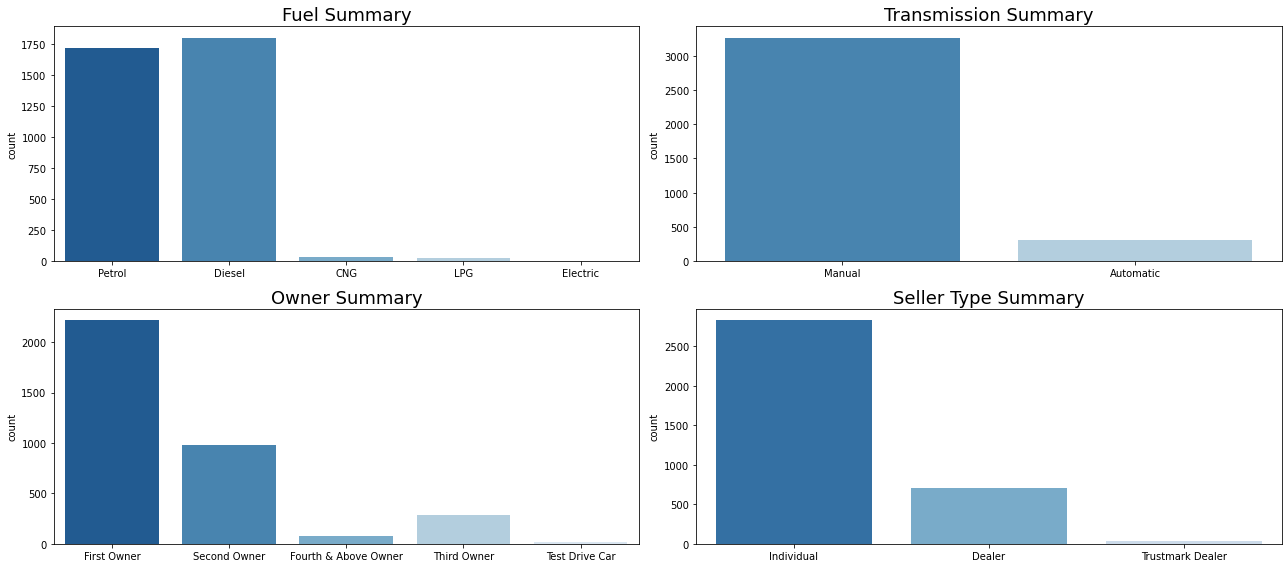

In [19]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

Based on the plot above, if we look at the Fuel from cars with the Diesel type, it has the same amount as the Transmission Manual, First Owner Car, and Individual Seller.

## Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

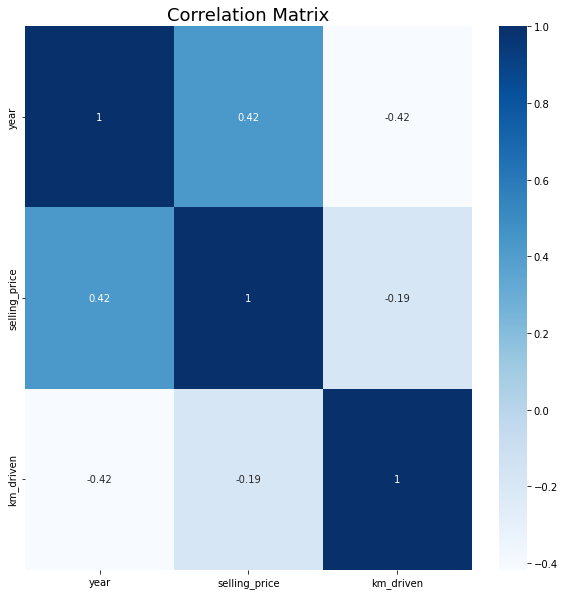

In [20]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(car.corr(), cbar=True, annot=True, cmap='Blues')

Based on the Correlation Matrix above, it provides information that if there is a new car, the selling price will be high, and if the car is the latest, the KM Driven will be low.

## Correlation Between selling_price and km_driven

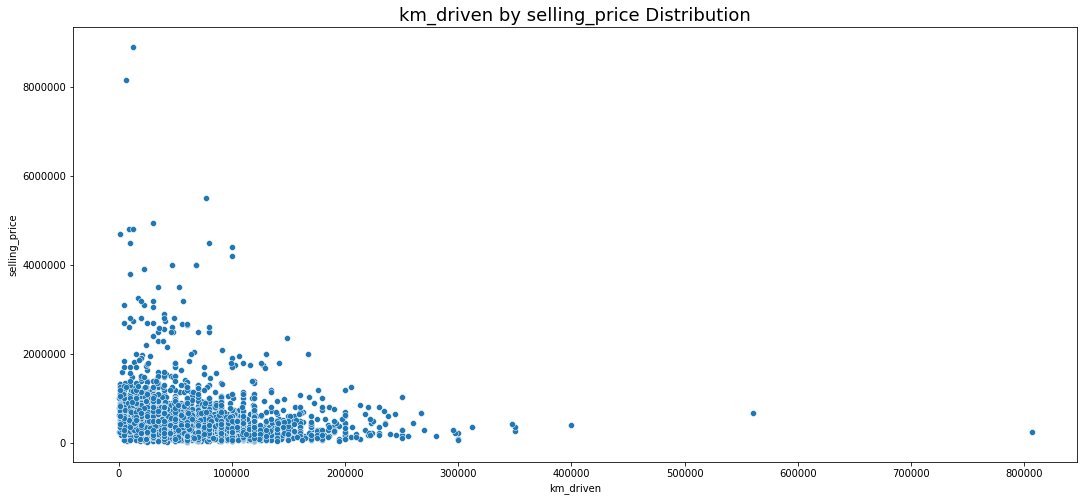

In [21]:
plt.figure(figsize=(18,8))
plt.title('km_driven by selling_price Distribution', fontsize=18)
sns.scatterplot(data=car, x='km_driven', y='selling_price')

plt.ticklabel_format(style='plain', axis='y')

The plot above provides information that on Car Dekho, Cars have a Selling Price below 2,000,000 with KM Driven conditions below 100,000 KM.

## Correlation Between selling_price and year

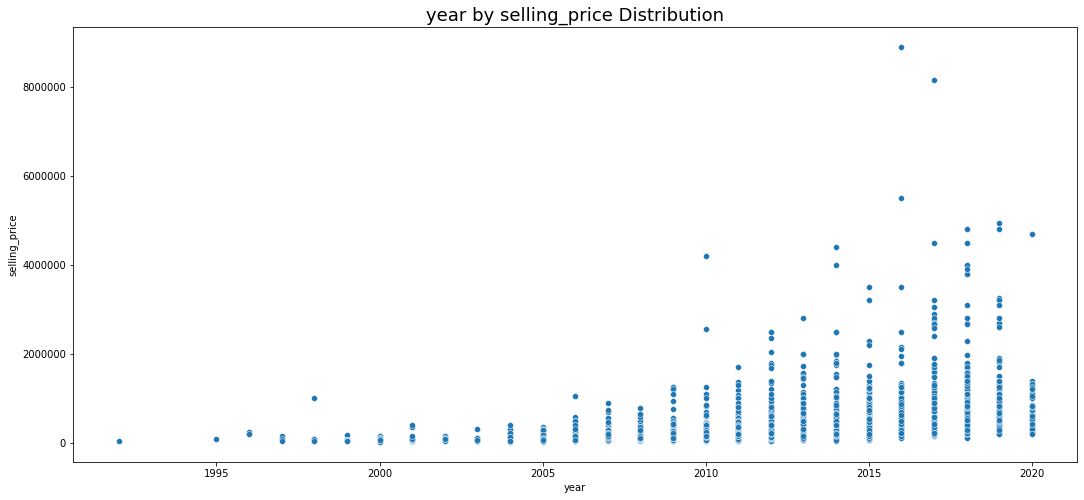

In [22]:
plt.figure(figsize=(18,8))
plt.title('year by selling_price Distribution', fontsize=18)
sns.scatterplot(data=car, x='year', y='selling_price')

plt.ticklabel_format(style='plain', axis='y')

The plot above provides information if the distribution of selling prices for cars in Car Dekho is the highest between 2016-2019.

## How does year affects km_driven?

<AxesSubplot:title={'center':'year by km_driven Distribution'}, xlabel='year', ylabel='km_driven'>

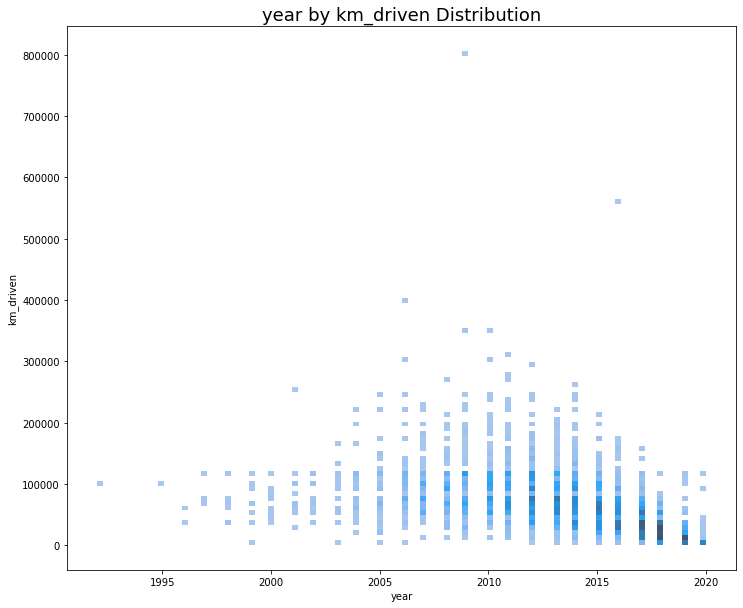

In [23]:
plt.figure(figsize=(12,10))
plt.title('year by km_driven Distribution', fontsize=18)
sns.histplot(data=car, x='year', y='km_driven', bins=100)
#plt.ticklabel_format(style='plain', axis='x')

The plot above provides information that on Car Dekho, most cars are still under 100,000 KM and the best car choices are in cars with years between 2017-2019 because the number of KM tends to be small and the number of units is large.

## Detailed Analysis in selling_price, km_driven, year

In [24]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='selling_price', ascending=False)

,km_driven,selling_price,year
name,,,
Audi RS7 2015-2019 Sportback Performance,13000.0,8900000.0,2016.0
Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500.0,8150000.0,2017.0
Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350.0,5500000.0,2016.0
BMW X5 xDrive 30d xLine,30000.0,4950000.0,2019.0
Audi A5 Sportback,1500.0,4700000.0,2020.0
...,...,...,...
Tata Nano Std BSII,50000.0,35000.0,2009.0
OpelCorsa 1.4 GL,100000.0,35000.0,2002.0
Maruti 800 EX,45000.0,35000.0,2002.5


In [25]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='km_driven', ascending=False)

,km_driven,selling_price,year
name,,,
Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,350000.0,280000.0,2010.0
Maruti SX4 S Cross DDiS 320 Delta,320000.0,495000.0,2015.5
Volkswagen Jetta 2.0 TDI Comfortline,312000.0,350000.0,2011.0
Mahindra Xylo E9,295000.0,300000.0,2012.0
Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,281500.0,550000.0,2008.0
...,...,...,...
Renault KWID Climber 1.0 MT Opt BSIV,1000.0,541000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Ford Ecosport Sports Petrol,1000.0,1100000.0,2020.0


In [26]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='year', ascending=False)

,km_driven,selling_price,year
name,,,
Ford Freestyle Titanium Plus,1010.0,852000.0,2020.0
Mahindra Scorpio S5 BSIV,11000.0,1200000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Hyundai Grand i10 Nios Sportz,5000.0,600000.0,2020.0
Hyundai Elite i20 Magna Plus BSIV,7300.0,545000.0,2020.0
...,...,...,...
Maruti Omni 5 Str STD,60000.0,65000.0,1998.0
Mercedes-Benz E-Class 230,35000.0,1000000.0,1998.0
Maruti Esteem AX,70000.0,79000.0,1997.0


The Audi RS7 2015-2019 Sportback Performance is the car model with the highest selling price, reaching 8,900,000 with a relatively small number of KM. In contrast, the Ford Icon 1.6 ZXI NXt is a car model with the lowest selling price of 20,000 but has a fairly high KM Driven, reaching 25,000 KM because it was purchased in 2005.

Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII is the car model with the highest KM Driven, reaching 350,000 KM with a selling price of 280,000 purchased in 2010. On the other hand, the Ford Figo Titanium is the car model with the lowest KM Driven with 606 KM with a selling price of 690,500 purchased in 2020.

## How does Categorical Feature affects selling_price

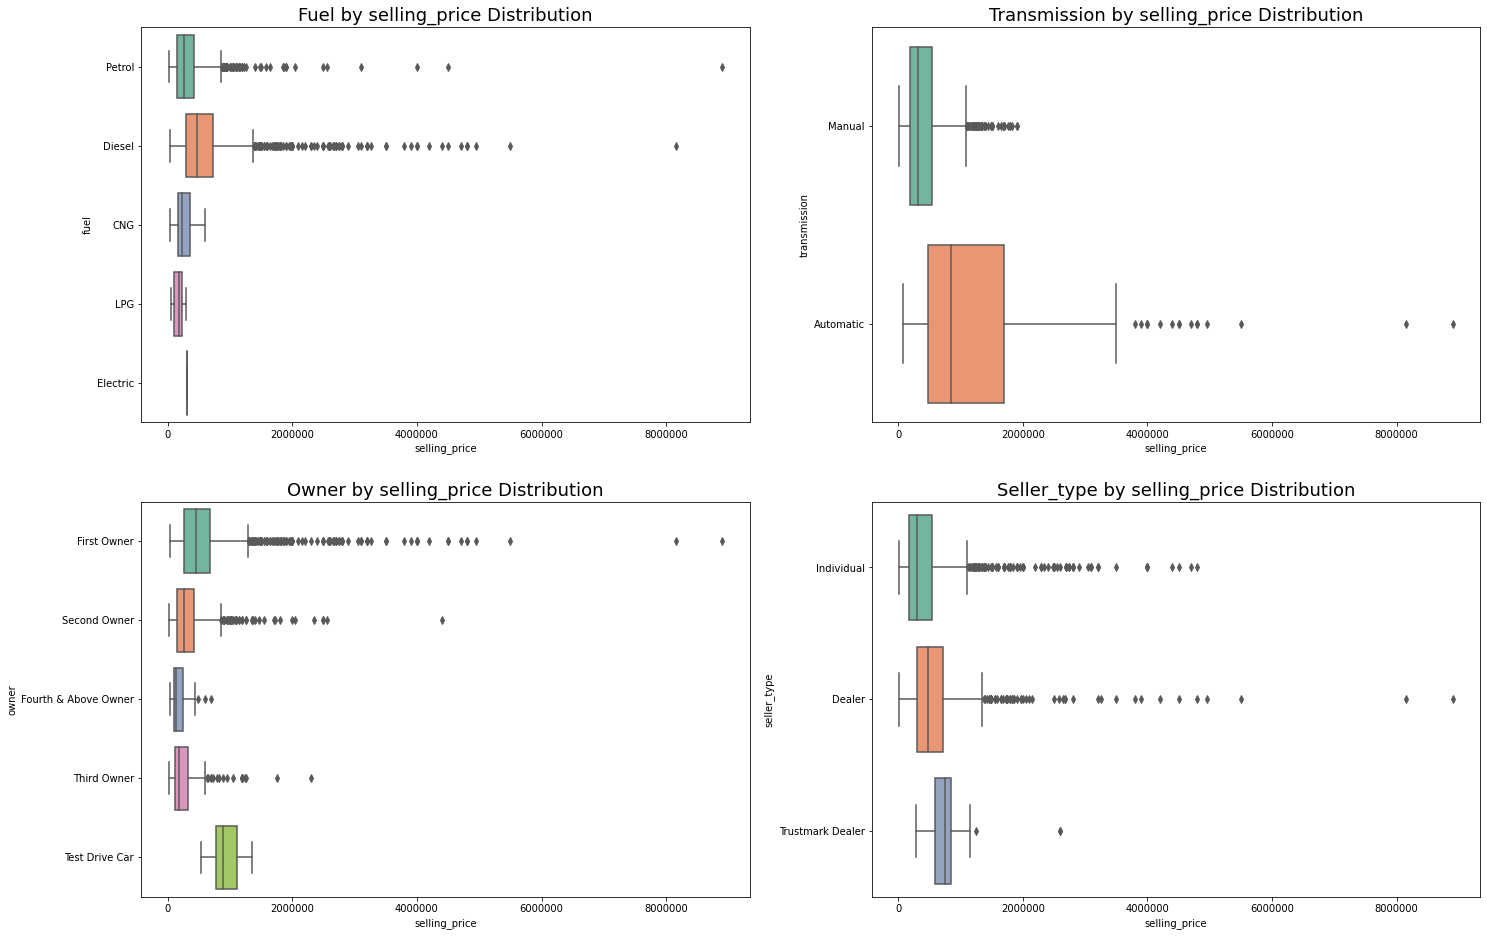

In [27]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')


In the Car Dekho dataset, Cars with the Diesel Fuel type have more influence on Selling Prices, just like the Transmission Automatic type which has more influence on Selling prices than Manual, First Owner also has a high influence on Selling Prices, and Seller Type Dealer also has a high influence on Selling Price.

# Conclusion

1. The Maruti model car has higher units in the Car Dekho dataset after Hyundai and Mahindra.
2. Fuel from cars with the Diesel type has a higher amount, the same as Manual Transmissions, First Owner Cars, and Individual Sellers.
3. IF there is a new car, the selling price will be high, and if the car is the latest, the KM Driven will be low.
4. Look for a quality car by looking at the number of KM Driven cars and the year the car was purchased. You also need to know the Owner Type and Seller Type because both of them can affect the Selling Price apart from KM Driven and Year.

<h4><center>Thank You!</center></h4>